In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Preparing the dataset to test in Suprivised ML models 

In [3]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
df = pd.read_csv("../../classData.csv") 


## Need to make the dataset into 0 and 1 (there is a fault or not fault)

In [49]:
InputVars = cols[4:]
OutputVars = cols[:4]
print("this is Input Cols: "  , InputVars)
print("this is Output Cols: "  ,OutputVars)

this is Input Cols:  ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
this is Output Cols:  ['G', 'C', 'B', 'A']


In [5]:
array = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df['fault_verify'] = array.astype(int) != 0
df['fault_verify'] = df['fault_verify'].astype(int) == 1
df['fault_verify'] = df['fault_verify'].astype(int)
df



,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_verify
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


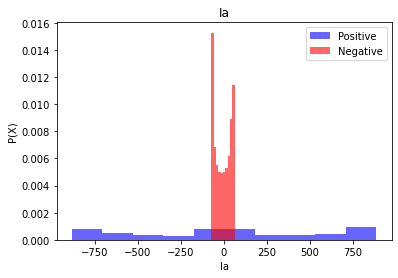

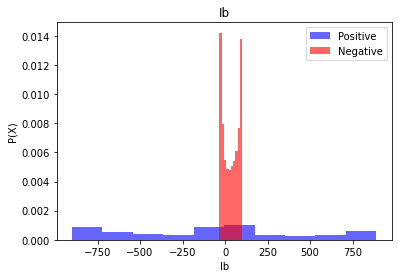

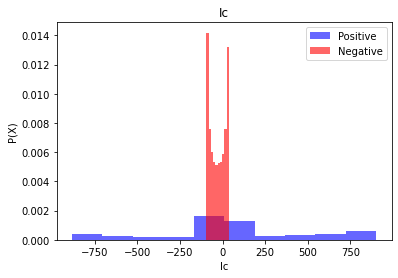

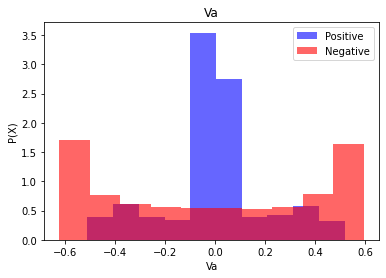

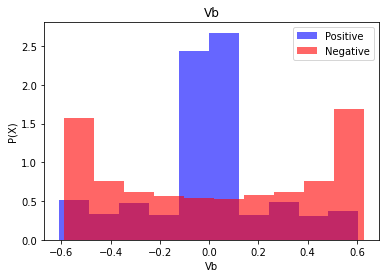

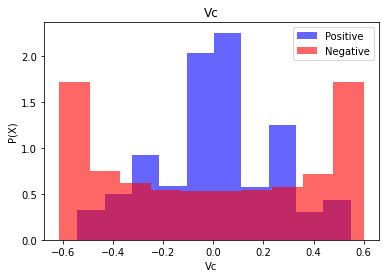

In [50]:
for label in cols[4:]:
    plt.hist(df[df["fault_verify"] == 1][label] , color= 'blue' , label="Positive" , alpha = 0.6 , density = True )
    plt.hist(df[df['fault_verify'] == 0][label] , color= 'red' , label="Negative" , alpha = 0.6 , density = True )
    plt.title(label)
    plt.ylabel("P(X)")
    plt.xlabel(label)
    plt.legend()
    plt.show()

fault_verify
True     5496
False    2365
Name: count, dtype: int64 .
- [x] we have a problem on sampling (false is not that much) need to fix it by add samples to false 

## Split the data into training and testing and validate sets to make the model.

In [82]:
train , valid , test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])



c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [83]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [84]:
def scale_dataset(dataframe , over_sampling=False):
    X = dataframe[dataframe.columns[4:]].values
    y = dataframe["fault_verify"].values
    # y = dataframe[dataframe["fault_verify"]].values

    scaler = StandardScaler()
    # StandardScaler standardizes features by removing the mean and scaling to unit variance
    # It transforms the data such that its distribution will have a  value 0 and standard deviation of 1
    X = scaler.fit_transform(X)

    if over_sampling:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, y.reshape(-1, 1))) 
    return data , X, y

In [85]:
train, X_train , y_train = scale_dataset(train , False)
valid, X_valid , y_valid = scale_dataset(valid , False)
test, X_test , y_test = scale_dataset(test , False)



In [86]:
print( sum(y_train == 1)  , sum(y_train == 0))


3315 1401


Good Now , we have good dataset , good model, good loss function.
Let's train the model.

# S. Models

## KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=5) # 3 , 5 , 7
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [89]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



- this perfect models for this dataset

## Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [92]:
y_pred = nb_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(1573,))

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



- this expected to model and situation like this 1 and 0s


## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression


In [95]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)


In [96]:
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(1573,))

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



- the same result as KNN and Naive Bayes

---

As we can see with oversampling or with not the same result we got !

for this situation but in other situation it's be usefull.


## Tree

In [ ]:
# tmr
